<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2021/week_2/TidyTuesday_Transit_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages and Data

Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-05/transit_cost.csv')

df.head()

,e,country,city,line,start_year,end_year,rr,length,tunnel_per,tunnel,stations,source1,cost,currency,year,ppp_rate,real_cost,cost_km_millions,source2,reference
0,7136.0,CA,Vancouver,Broadway,2020,2025,0.0,5.7,87.72%,5.0,6.0,Plan,2830.0,CAD,2018.0,0.84,2377.2,417.052632,Media,https://www.translink.ca/Plans-and-Projects/Ra...
1,7137.0,CA,Toronto,Vaughan,2009,2017,0.0,8.6,100.00%,8.6,6.0,Media,3200.0,CAD,2013.0,0.81,2592,301.395349,Media,https://www.thestar.com/news/gta/transportatio...
2,7138.0,CA,Toronto,Scarborough,2020,2030,0.0,7.8,100.00%,7.8,3.0,Wiki,5500.0,CAD,2018.0,0.84,4620,592.307692,Media,https://urbantoronto.ca/news/2020/03/metrolinx...
3,7139.0,CA,Toronto,Ontario,2020,2030,0.0,15.5,57.00%,8.8,15.0,Plan,8573.0,CAD,2019.0,0.84,7201.32,464.601290,Plan,https://metrolinx.files.wordpress.com/2019/07/...
4,7144.0,CA,Toronto,Yonge to Richmond Hill,2020,2030,0.0,7.4,100.00%,7.4,6.0,Plan,5600.0,CAD,2020.0,0.84,4704,635.675676,Media,https://www.thestar.com/news/gta/2020/06/24/me...


# Wrangle

In [3]:
# Countries that have at least 10 projects
df_count = df.groupby('country').count().reset_index().sort_values(by = 'e', ascending = False)
top_countries = df_count[df_count['e'] >= 10]['country'].to_list()

# Country names
country_names = ['China', 'India', 'Turkey', 'Japan', ' France', 'Spain', 'United\nStates', 'Germany', 'Taiwan', 'Italy', 'Canada']

# For all the projects in those countries get the following: code, length, percent complete, real cose (in billions)
df_filter = df[df['country'].isin(top_countries)][['country', 'e', 'length', 'tunnel_per', 'real_cost']]
df_filter['real_cost'] = df_filter['real_cost'].astype(float) / 100

# Wrangle tunnel percent (who decided to include a percent sign anyway?)
df_filter['tunnel_per'] = df_filter['tunnel_per'].str.replace('%', '').astype(float) / 100

# Only focus on projects no more than 100 km (not too many greater than that)
df_filter = df_filter[df_filter['length'] <= 100]

# Glorious, glorious clean data
df_filter.head()

,country,e,length,tunnel_per,real_cost
0,CA,7136.0,5.7,0.8772,23.7720
1,CA,7137.0,8.6,1.0000,25.9200
2,CA,7138.0,7.8,1.0000,46.2000
3,CA,7139.0,15.5,0.5700,72.0132
4,CA,7144.0,7.4,1.0000,47.0400


# Data Visualization

**Version with legend and clear scatter points**

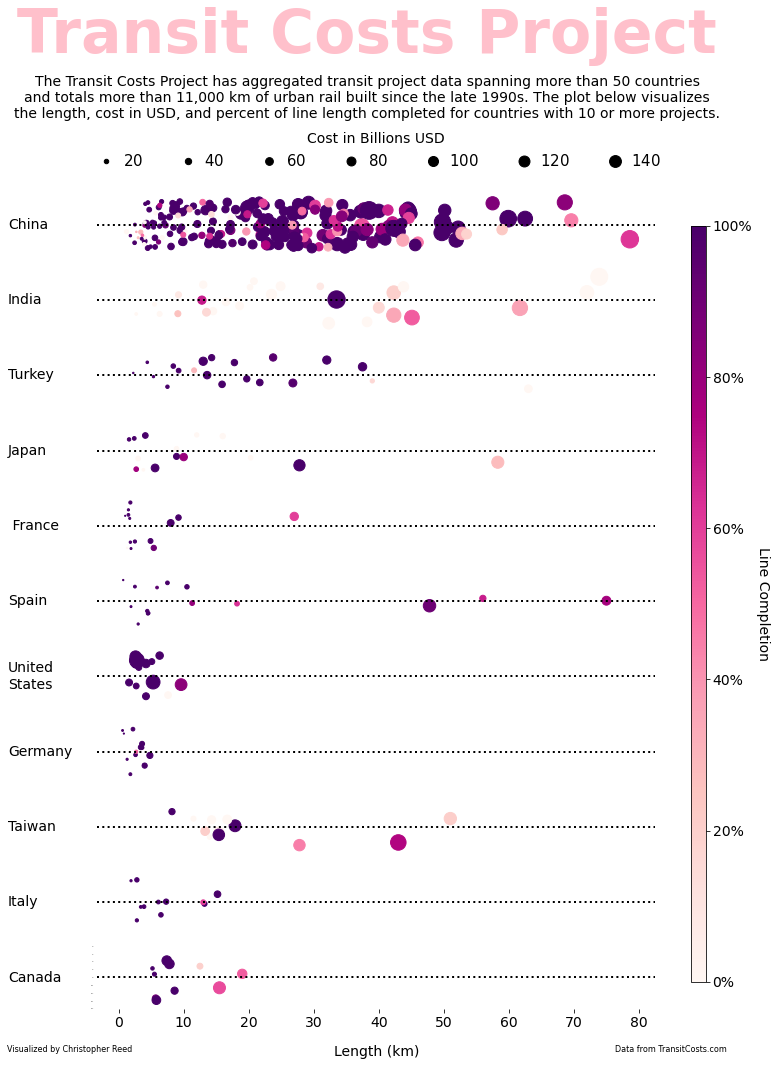

In [55]:
#################
### PREP WORK ###
#################

# Number of top countries. Need this for # of rows in plot.
num_countries = len(top_countries)

# Normalize for colormap on scatter plots showing project % completion.
mini, maxi = 0, 1
norm = plt.Normalize(mini, maxi)

##############################
### CREATE FIGURE AND AXES ###
##############################

fig, axes = plt.subplots(ncols = 1,
                         nrows = num_countries,
                         figsize = (10, 15),
                         sharex = True)

#############################
### PLOT ROWS (COUNTRIES) ###
#############################

for ax, country, country_name in zip(np.ravel(axes), top_countries, country_names):

  # Filter df to country
  df_country = df_filter[df_filter['country'] == country]

  # Horizontal line for aesthetics
  ax.axhline(y = 0, ls = ':', lw = 2, color = 'black')

  # Country name on left side
  ax.text(-17, 0, country_name, fontsize = 14, va = 'center')
  
  # Set ylim so it is greater than the possible y coords for points
  ax.set_ylim(bottom = -1, top = 1)


  # Edge case for Canada bc last row
  if country == 'CA':

    # Make a swarm plot using mpl scatter plot function
    # X values are project length, y values are meaningless random values between 0 and 1
    # Size is the real cost (multiply two to get bigger circles)
    # Color is line completion applying `norm` which was defined earlier
    # `clip_on` controls if the points at the edge of each plot get cut off or not
    # Save plot as `scatter` so we can make color bar/legend later.
    scatter = ax.scatter(x = df_country['length'],
                       y = random.sample(np.arange(-0.75,0.75,0.00001).tolist(), df_country.shape[0]),
                       s = df_country['real_cost']*2,
                       c = df_country['tunnel_per'],
                       cmap = 'RdPu',
                       norm = norm,
                       clip_on = False)
    
    # No y ticks/labels, but we want x ticks for the last row
    ax.tick_params(axis = 'y', length = 0, labelsize = 0)
    ax.tick_params(axis = 'x', labelsize = 14)

    # Spines be gone!
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # X-axis label
    ax.set_xlabel('Length (km)', fontsize = 14, labelpad = 15)


  # All other rows
  else:

    # Same as above, just not saved as scatter. But it could be, doesn't matter bc they are all the same cmap/legend
    ax.scatter(x = df_country['length'],
                       y = random.sample(np.arange(-0.75,0.75,0.00001).tolist(), df_country.shape[0]),
                       s = df_country['real_cost']*2,
                       c = df_country['tunnel_per'],
                       cmap = 'RdPu',
                       norm = norm,
                       clip_on = False)
    
    # No spines or ticks
    ax.axis('off')

############
### TEXT ###
############

# Main title
fig.text(0.5, 1.01,
         'Transit Costs Project',
         fontsize = 60,
         weight = 'bold',
         color = 'pink',
         ha = 'center')

# Description text
description_text = """The Transit Costs Project has aggregated transit project data spanning more than 50 countries
and totals more than 11,000 km of urban rail built since the late 1990s. The plot below visualizes
the length, cost in USD, and percent of line length completed for countries with 10 or more projects."""

fig.text(0.5, 0.95,
         description_text,
         fontsize = 14,
         ha = 'center')

# Credits
fig.text(0, 0.085,
         'Visualized by Christopher Reed',
         fontsize = 8,
         ha = 'left')

fig.text(1, 0.085,
         'Data from TransitCosts.com',
         fontsize = 8,
         ha = 'right')

##############
### LEGEND ###
##############

# Legend was a real pain. 
# Used this (https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html) as a reference
# Extract handles and labels from one of the scatter plots

# Extract handles, labels from `legend`
handles, labels = scatter.legend_elements(prop = 'sizes', num = 8)

# Place legend using the first row (axes[0])
legend = axes[0].legend(handles, labels,
                        title = 'Cost in Billions USD',
                        loc=  'upper center',
                        bbox_to_anchor = (0.5, 2.2),
                        handletextpad=0.1,
                        ncol = 10,
                        frameon = False,
                        prop = {'size':15})

# Fontsize of legend title
legend.get_title().set_fontsize('14')


###############
## COLOR BAR ##
###############

# Create axis for color bar [figure left corner position, figure height position, width of bar, height of bar]
cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])

# Make colorar using `scatter` variable. Place on color bar axis (cax)
fig.colorbar(scatter, cax = cax, orientation = 'vertical')

# Ticks on top (right) of colorbar
cax.xaxis.set_ticks_position('top')

# Tick labels
cax.set_yticklabels(['0%', '20%', '40%',
                     '60%', '80%', '100%'])

# Tick params
cax.tick_params(axis = 'y', labelsize = 14)

# Text inside colorbar
cax.text(5, 0.5, 'Line Completion', ha = 'center', va = 'center', fontsize = 14, rotation = 270)

###############
### SAVE FIG ##
###############

plt.savefig('Transit Costs', bbox_inches = 'tight')

**Artsy version** ✨

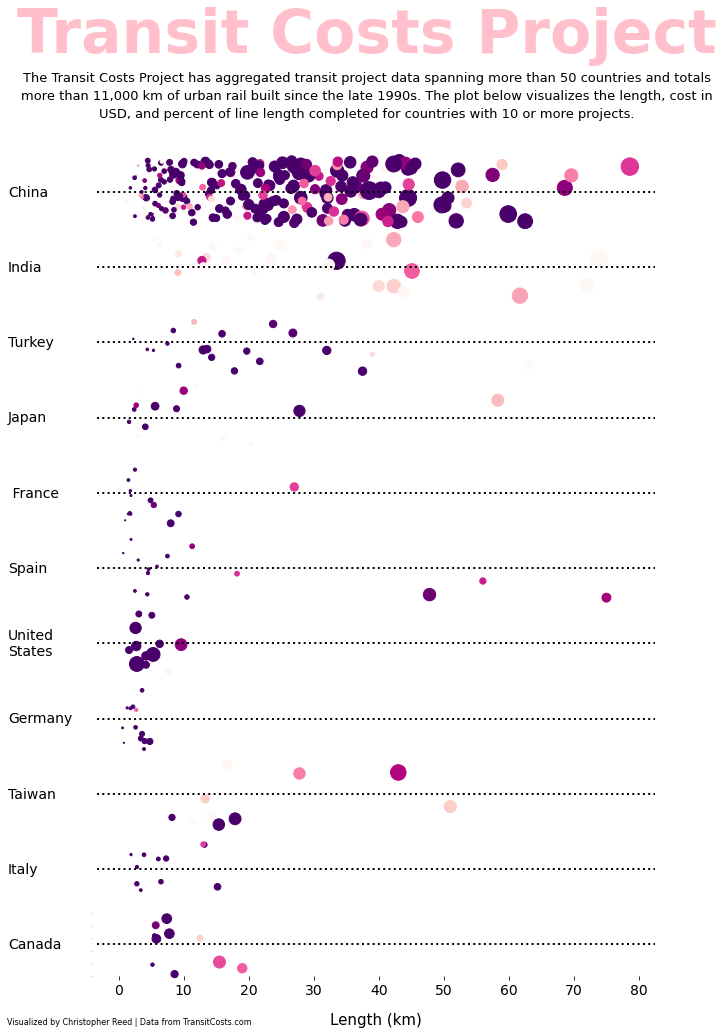

In [41]:
#################
### PREP WORK ###
#################

# Number of top countries. Need this for # of rows in plot.
num_countries = len(top_countries)

# Normalize for colormap on scatter plots showing project % completion.
mini, maxi = 0, 1
norm = plt.Normalize(mini, maxi)

##############################
### CREATE FIGURE AND AXES ###
##############################

fig, axes = plt.subplots(ncols = 1,
                         nrows = num_countries,
                         figsize = (10, 15),
                         sharex = True)

#############################
### PLOT ROWS (COUNTRIES) ###
#############################

for ax, country, country_name in zip(np.ravel(axes), top_countries, country_names):

  # Filter df to country
  df_country = df_filter[df_filter['country'] == country]

  # Horizontal line for aesthetics
  ax.axhline(y = 0.5, ls = ':', lw = 2, color = 'black')

  # Country name on left side
  ax.text(-17, 0.5, country_name, fontsize = 14, va = 'center')
  
  # Set ylim so it is greater than the possible y coords for points
  ax.set_ylim(bottom = 0, top = 1)


  # Edge case for Canada bc last row
  if country == 'CA':

    # Make a swarm plot using mpl scatter plot function
    # X values are project length, y values are meaningless random values between 0 and 1
    # Size is the real cost (multiply two to get bigger circles)
    # Color is line completion applying `norm` which was defined earlier
    # `clip_on` controls if the points at the edge of each plot get cut off or not
    # Save plot as `scatter` so we can make color bar/legend later.
    scatter = ax.scatter(x = df_country['length'],
                       y = random.sample(np.arange(0,1,0.00001).tolist(), df_country.shape[0]),
                       s = df_country['real_cost']*2,
                       c = df_country['tunnel_per'],
                       cmap = 'RdPu',
                       norm = norm,
                       clip_on = False)
    
    # No y ticks/labels, but we want x ticks for the last row
    ax.tick_params(axis = 'y', length = 0, labelsize = 0)
    ax.tick_params(axis = 'x', labelsize = 14)

    # Spines be gone!
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # X-axis label
    ax.set_xlabel('Length (km)', fontsize = 15, labelpad = 15)


  # All other rows
  else:

    # Same as above, just not saved as scatter. But it could be, doesn't matter bc they are all the same cmap/legend
    ax.scatter(x = df_country['length'],
                       y = random.sample(np.arange(0,1,0.00001).tolist(), df_country.shape[0]),
                       s = df_country['real_cost']*2,
                       c = df_country['tunnel_per'],
                       cmap = 'RdPu',
                       norm = norm,
                       clip_on = False)
    
    # No spines or ticks
    ax.axis('off')

############
### TEXT ###
############

# Main title
fig.text(0.5, 0.98,
         'Transit Costs Project',
         fontsize = 60,
         weight = 'bold',
         color = 'pink',
         ha = 'center')

# Description text
description_text = """The Transit Costs Project has aggregated transit project data spanning more than 50 countries and totals
more than 11,000 km of urban rail built since the late 1990s. The plot below visualizes the length, cost in
USD, and percent of line length completed for countries with 10 or more projects."""

fig.text(0.5, 0.92,
         description_text,
         fontsize = 13,
         linespacing = 1.5,
         ha = 'center')

# Credits
fig.text(0, 0.08,
         'Visualized by Christopher Reed | Data from TransitCosts.com',
         fontsize = 8,
         ha = 'left')

##############
## SAVE FIG ##
##############

plt.savefig('Transit Costs Artsy', bbox_inches = 'tight')